In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './032018_48hrs/'

path_cyt = folder + 'Cytoplasm.xlsx'
path_nuc = folder + 'Nucleus.xlsx'

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT474+C3H-3,Cntrl(re,c2-4)',
        'BT474+C3H-3,30nM(re,c5-7)',
        'BT474+C3H-3,300nM(re,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t))
    df = pd.concat(dt, ignore_index=True)
    df['Row'] = df['Well'].apply(lambda x: x[0])
    return df

def plot_grid(df, w, h, title):
    fig, axes = plt.subplots(w, h, figsize=(24, 24))
    cols = df_cyt.columns[4:13]

    for k in range(w * h):
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False, 
                       ax=axes[k // 3][k % 3]).set_title(title)  
    plt.show()

def plot_col(df, h, title):
    cols = df.columns[4:13]
    for k in range(h):
        plt.gcf().set_size_inches(8, 8) 
        sns.violinplot(data=df, 
                       x='Row', 
                       y=cols[k], 
                       hue='Group', 
                       dodge=False)
        plt.title(title)  
        plt.show()

In [2]:
df_cyt = concat_df(path_cyt)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Row
0,11100010018,B02,1,0,6.1e+05,34418.9,54596.2,25364.8,28330.5,54596.2,1913.7,9510.9,13633.8,B
1,11100020013,B02,1,0,1.4e+06,311103.3,101851.6,43709.0,73056.7,101851.6,6120.7,16078.1,12079.2,B
2,11100030022,B02,1,0,1.9e+06,162176.2,183881.8,104492.1,206216.4,183881.8,23716.0,23564.9,31449.9,B
3,11100040016,B02,1,0,1.3e+06,538824.0,84439.7,45970.9,70549.5,84439.7,1426.4,20359.0,16116.3,B
4,11100050019,B02,1,0,1.3e+06,217196.1,58911.0,26316.6,27367.7,58911.0,2993.7,17980.0,21591.7,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343804,49911711034,E10,9,2,2.2e+05,16640.2,44580.2,4733.4,27072.3,44580.2,8104.0,7305.9,17668.4,E
343805,49911721034,E10,9,2,2.5e+05,96468.8,40339.2,16100.2,26939.8,40339.2,10418.5,12620.9,15018.5,E
343806,49911731035,E10,9,2,2.9e+05,162932.7,30150.8,46467.5,29489.4,30150.8,9917.5,12035.9,19004.7,E
343807,49911741036,E10,9,2,2.3e+05,13803.6,35212.8,7303.4,17433.2,35212.8,2545.4,6376.2,16880.5,E


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343809 entries, 0 to 343808
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         343809 non-null  int64  
 1   Well                            343809 non-null  object 
 2   Field                           343809 non-null  int64  
 3   Group                           343809 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        343809 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  343809 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            343809 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       343809 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          343809 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            343809 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         343809 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          343809 non-null  float64
 12  Vimentin (Cycle 

In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

34402740219    1
27101770195    1
39511140816    1
22712420820    1
22508470741    1
              ..
26712220974    1
38713750836    1
22712470835    1
29905630570    1
48907010612    1
Name: Cell ID, Length: 343809, dtype: int64

In [5]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[4:13]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05
mean,5.4e+05,5.3e+04,8.6e+04,3.7e+04,4.0e+04,8.6e+04,9.2e+03,1.9e+04,3.3e+04
std,3.7e+05,9.9e+04,7.4e+04,5.8e+04,3.5e+04,7.4e+04,1.6e+04,2.7e+04,5.9e+04
min,1.6e+02,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.1e+05,1.4e+04,4.5e+04,1.1e+04,2.0e+04,4.5e+04,3.6e+03,1.2e+04,2.0e+04
50%,4.4e+05,2.1e+04,6.6e+04,1.9e+04,2.9e+04,6.6e+04,5.9e+03,1.6e+04,2.6e+04
75%,6.4e+05,4.1e+04,1.0e+05,4.0e+04,4.7e+04,1.0e+05,1.1e+04,2.3e+04,3.7e+04
max,1.3e+07,2.7e+06,8.8e+06,4.7e+06,3.6e+06,8.8e+06,1.2e+06,4.2e+06,8.8e+06


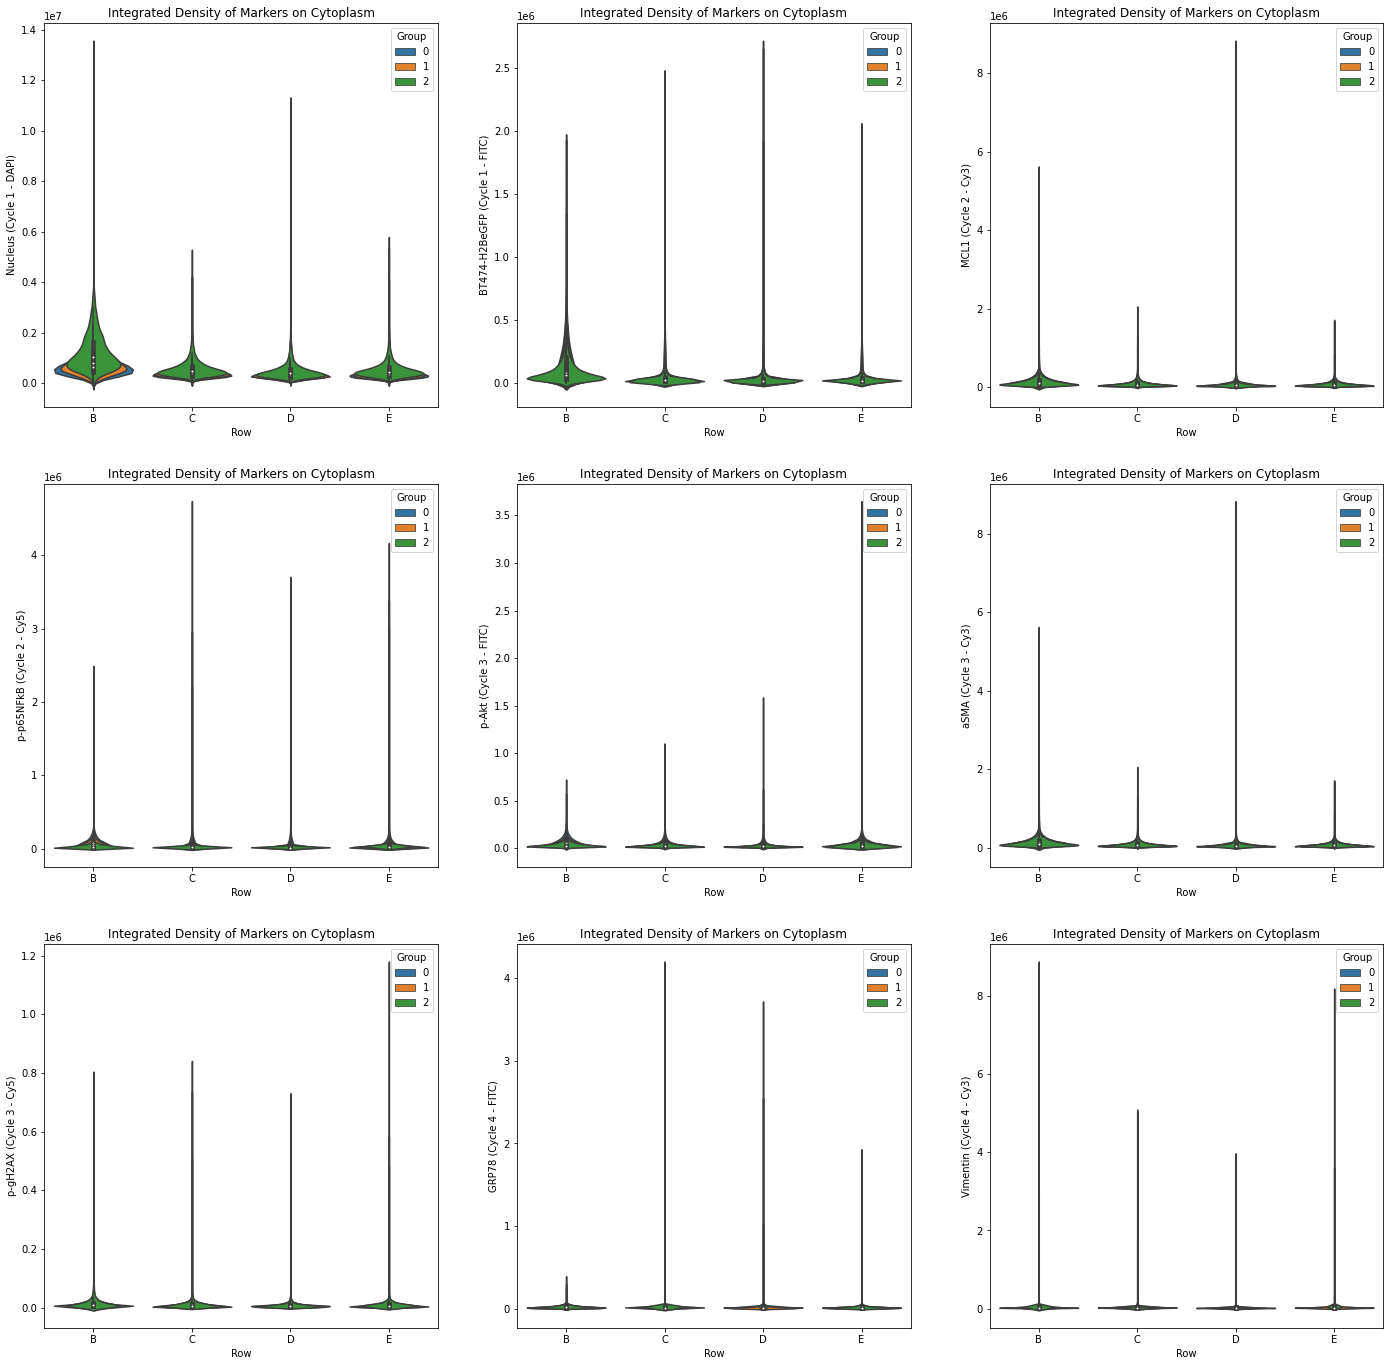

In [6]:
# Plot a grid of plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Cytoplasm'
plot_grid(df_cyt, 3, 3, title)

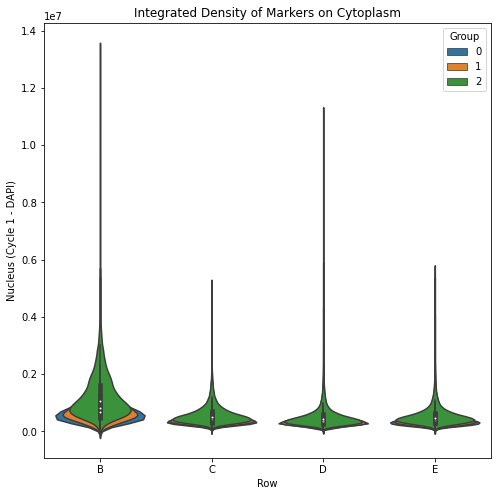

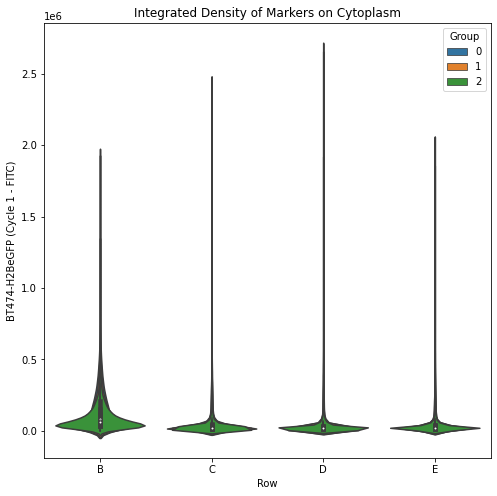

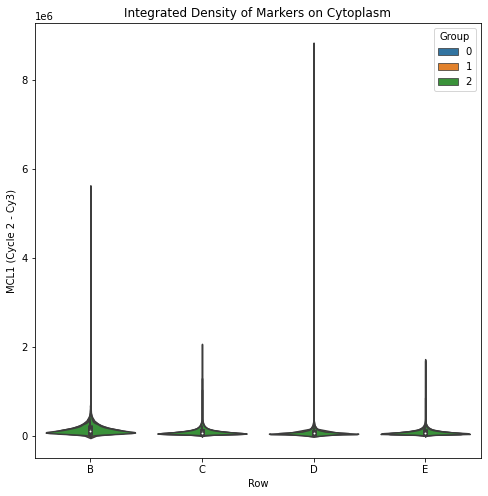

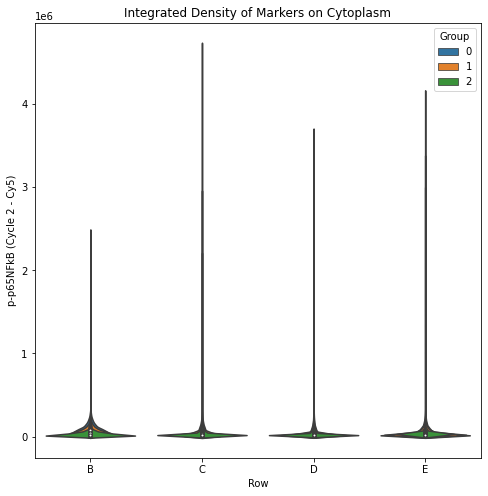

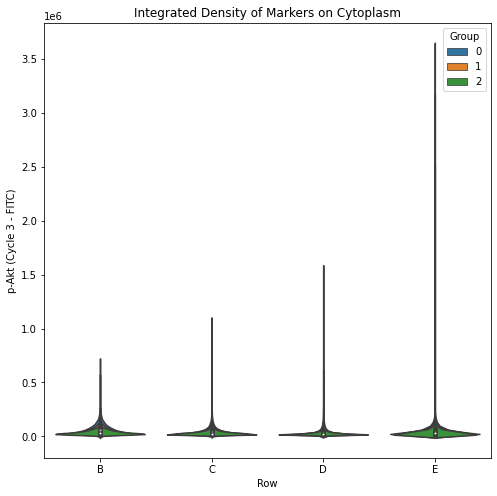

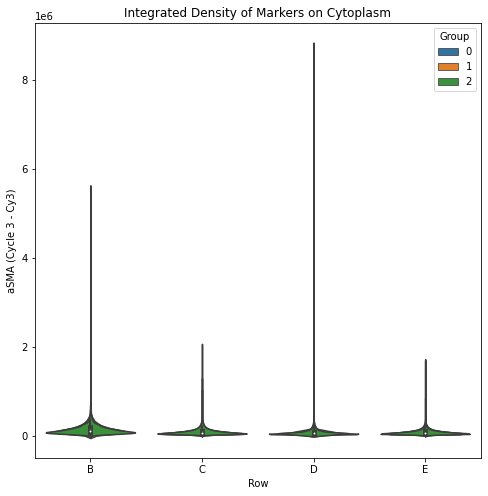

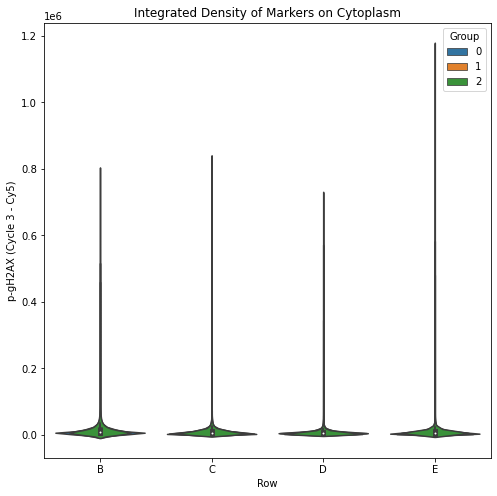

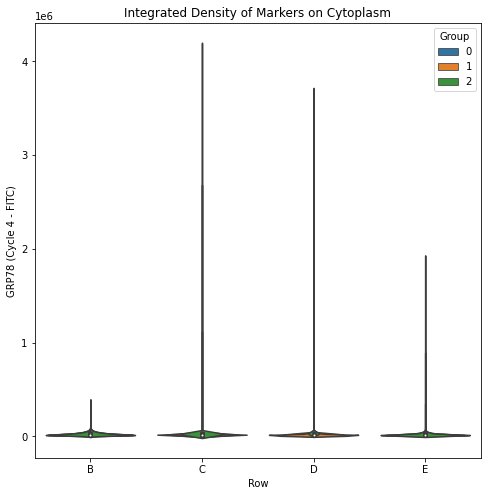

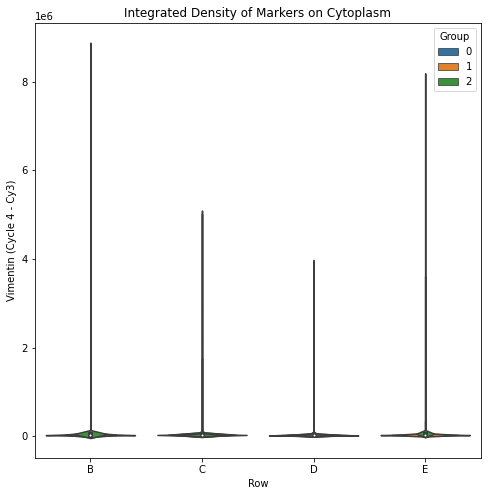

In [7]:
# Plot column plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Cytoplasm'
plot_col(df_cyt, 9, title)

In [9]:
df_nuc = concat_df(path_nuc)
print('*** Nucleus Dataset:')
df_nuc

*** Nucleus Dataset:


,Cell ID,Well,Field,Group,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Row
0,11100010018,B02,1,0,5.6e+05,2.3e+04,47410.8,18775.5,17338.1,47410.8,2564.1,5208.0,8728.1,B
1,11100020013,B02,1,0,2.0e+06,4.0e+05,144126.7,53127.4,80662.3,144126.7,6628.4,15294.5,13145.6,B
2,11100030022,B02,1,0,6.3e+06,1.2e+06,707129.5,308543.5,456920.4,707129.5,52415.0,88088.8,88175.4,B
3,11100040016,B02,1,0,2.1e+06,8.9e+05,75235.3,35813.9,73964.3,75235.3,332.8,26913.5,21894.8,B
4,11100050019,B02,1,0,2.7e+06,5.3e+05,128568.1,53633.4,38732.9,128568.1,4874.3,34775.5,40027.6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343804,49911711034,E10,9,2,2.9e+05,1.4e+04,43995.2,4011.7,26742.8,43995.2,7393.4,5319.2,13259.3,E
343805,49911721034,E10,9,2,2.6e+05,7.9e+04,32666.5,17186.1,14975.2,32666.5,8839.3,10663.8,14687.4,E
343806,49911731035,E10,9,2,1.9e+05,6.7e+04,19101.5,27440.7,22890.8,19101.5,5784.5,7742.3,10084.8,E
343807,49911741036,E10,9,2,1.2e+05,6.1e+03,15456.6,3183.0,7707.5,15456.6,1188.6,4212.9,8095.5,E


In [10]:
# All columns in the Nucleus dataset's information
df_nuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343809 entries, 0 to 343808
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         343809 non-null  int64  
 1   Well                            343809 non-null  object 
 2   Field                           343809 non-null  int64  
 3   Group                           343809 non-null  int64  
 4   Nucleus (Cycle 1 - DAPI)        343809 non-null  float64
 5   BT474-H2BeGFP (Cycle 1 - FITC)  343809 non-null  float64
 6   MCL1 (Cycle 2 - Cy3)            343809 non-null  float64
 7   p-p65NFkB (Cycle 2 - Cy5)       343809 non-null  float64
 8   p-Akt (Cycle 3 - FITC)          343809 non-null  float64
 9   aSMA (Cycle 3 - Cy3)            343809 non-null  float64
 10  p-gH2AX (Cycle 3 - Cy5)         343809 non-null  float64
 11  GRP78 (Cycle 4 - FITC)          343809 non-null  float64
 12  Vimentin (Cycle 

In [11]:
# Check if duplicate ID exists in Nucleus dataset
df_nuc['Cell ID'].value_counts()

34402740219    1
27101770195    1
39511140816    1
22712420820    1
22508470741    1
              ..
26712220974    1
38713750836    1
22712470835    1
29905630570    1
48907010612    1
Name: Cell ID, Length: 343809, dtype: int64

In [12]:
# Nucleus Markers' statistics
df_nuc[df_nuc.columns[4:13]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05,3.4e+05
mean,9.9e+05,1.1e+05,9.8e+04,4.4e+04,4.6e+04,9.8e+04,1.2e+04,2.0e+04,3.2e+04
std,1.3e+06,3.3e+05,1.8e+05,9.8e+04,7.2e+04,1.8e+05,3.3e+04,3.4e+04,7.6e+04
min,2.5e+03,2.3e+02,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.0e+05,8.3e+03,2.6e+04,6.5e+03,1.3e+04,2.6e+04,2.9e+03,7.3e+03,1.2e+04
50%,5.5e+05,1.6e+04,4.7e+04,1.3e+04,2.3e+04,4.7e+04,5.6e+03,1.2e+04,2.0e+04
75%,1.1e+06,4.7e+04,9.7e+04,3.6e+04,4.7e+04,9.7e+04,1.2e+04,2.3e+04,3.6e+04
max,2.4e+07,1.2e+07,1.9e+07,7.6e+06,4.0e+06,1.9e+07,4.7e+06,5.6e+06,1.4e+07


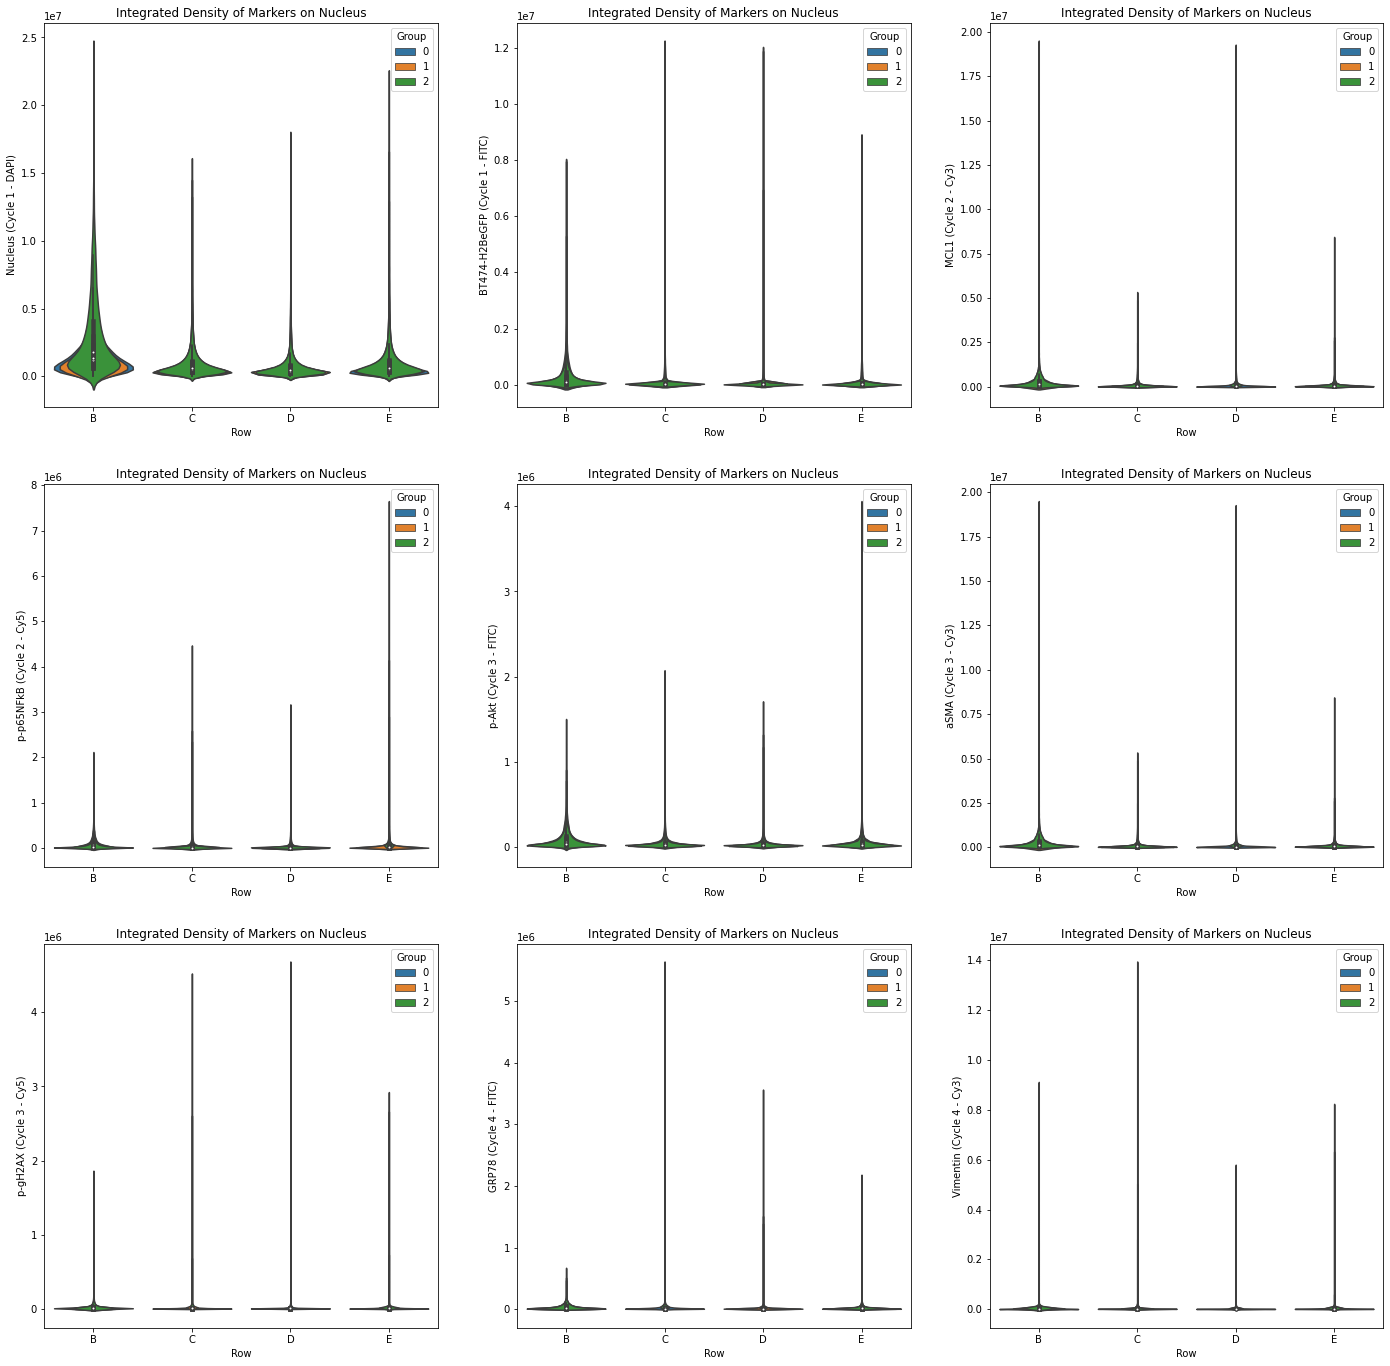

In [13]:
# Plot a grid of plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Nucleus'
plot_grid(df_nuc, 3, 3, title)

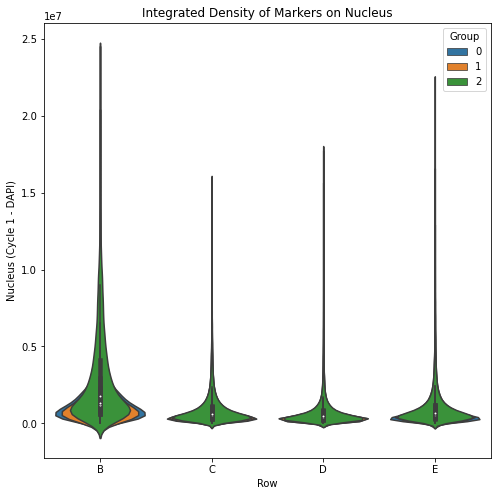

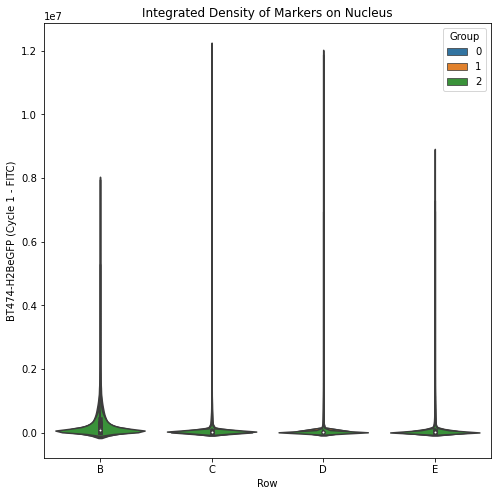

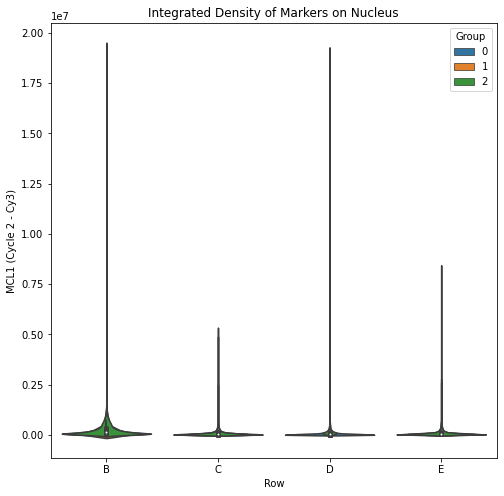

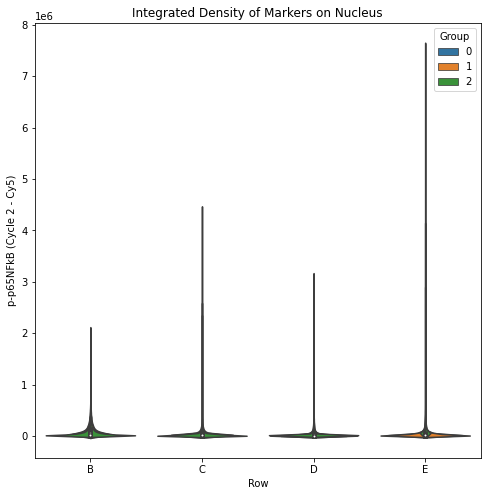

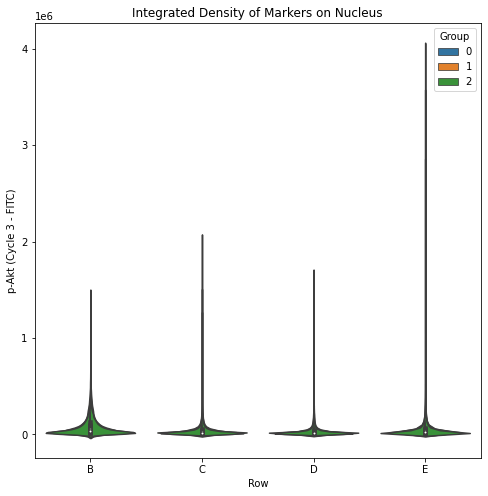

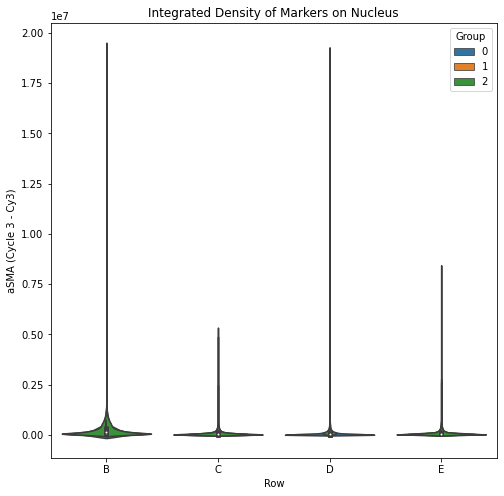

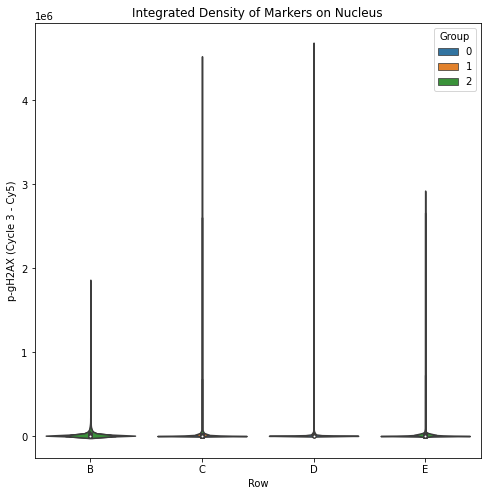

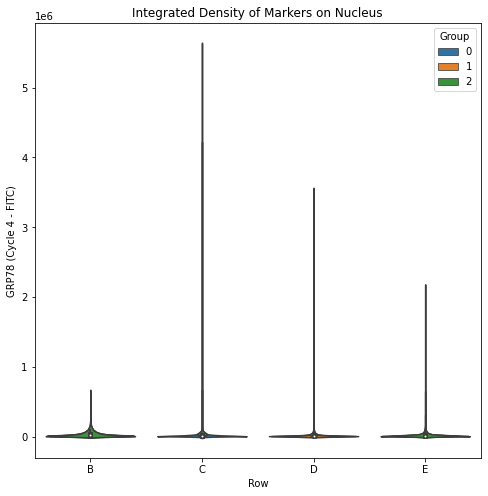

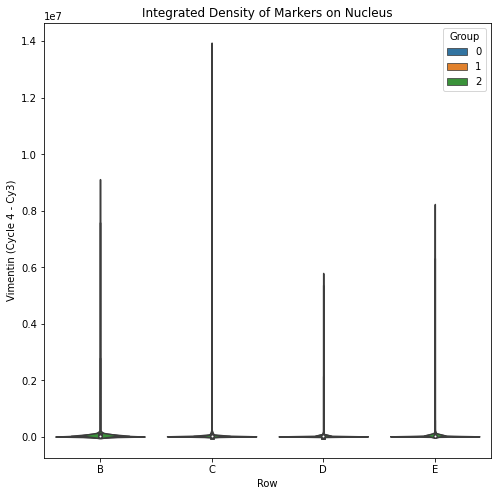

In [14]:
# Plot column plots for Cytoplasm dataset
title = 'Integrated Density of Markers on Nucleus'
plot_col(df_nuc, 9, title)